## Mean Normalization 

In [1]:
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('datasets/cifar-10-batches-py/data_batch_1', 'rb') as input_file: 
    X = pickle.load(input_file, encoding='latin1')

In [4]:
X = X['data']

In [5]:
X.shape

(10000, 3072)

In [6]:
X = X.reshape((-1, 3, 32, 32))
X.shape

(10000, 3, 32, 32)

In [7]:
X = X.transpose(0, 2, 3, 1)
X.shape

(10000, 32, 32, 3)

In [8]:
X = X.reshape(-1, 3072)
X.shape

(10000, 3072)

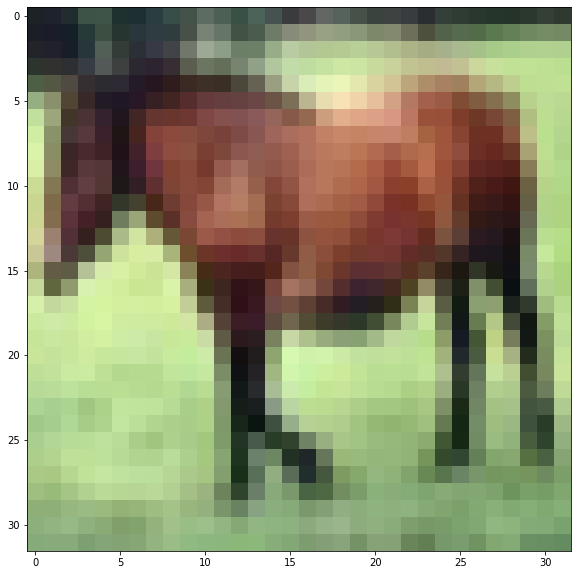

In [9]:
plt.figure(figsize = (10, 10))
plt.imshow(X[7].reshape(32, 32, 3))
plt.show()

## Normalization
* zero-centre the data :this calculates the mean separately across pixels and colour channels
* divide by std

In [11]:
X.mean(axis=0).shape

(3072,)

In [12]:
X = X - X.mean(axis=0)

In [13]:
np.std(X, axis=0).shape

(3072,)

In [14]:
X = X / np.std(X, axis=0) 

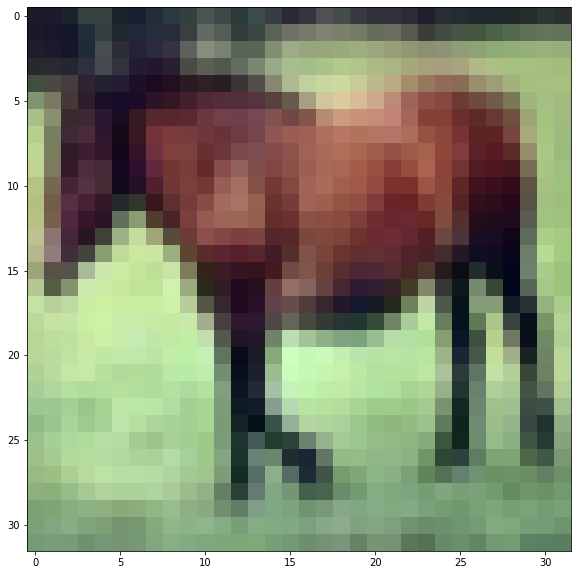

In [15]:
def show(i):
    i = i.reshape((32, 32, 3))
    m, M = i.min(), i.max()
   
    plt.figure(figsize = (10, 10))
    plt.imshow((i - m) / (M - m))
    plt.show()

show(X[7])

### ZCA whitening
Whitening is a transformation of data in such a way that its covariance matrix Σ is the identity matrix. Hence whitening decorrelates features. It is used as a preprocessing method.  principal component analysis (PCA) and zero-phase component analysis (ZCA) are the two ways to do this.

* compute the covariance of the image data
* perform singular value decomposition (These steps take time)
* build the ZCA matrix
* transform the image data  

In [16]:
covariance_matrix = np.cov(X, rowvar=True)   

In [17]:
covariance_matrix.shape

(10000, 10000)

In [18]:
U, S, V = np.linalg.svd(covariance_matrix)     

In [19]:
print(U.shape)
print(S.shape)
print(V.shape)

(10000, 10000)
(10000,)
(10000, 10000)


In [20]:
epsilon = 1e-5

zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))

In [21]:
zca_matrix.shape

(10000, 10000)

In [22]:
zca = np.dot(zca_matrix, X)   

In [23]:
zca.shape

(10000, 3072)

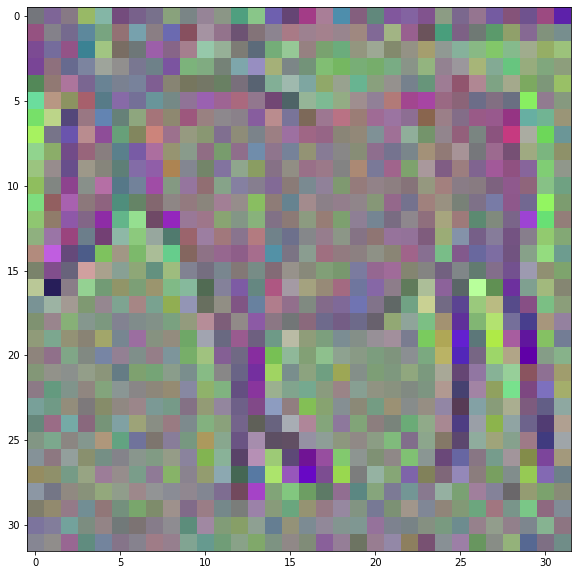

In [24]:
show(zca[7])